<a href="https://colab.research.google.com/github/RafsanJany-44/NLP_Research/blob/master/tensoreflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade nbformat

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as pyo

df = pd.read_csv("Main_Result.csv")

In [2]:
df

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing. so is chemistry. i really real...,1.0
2,thanks khan academy! wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0
...,...,...
4531,is wondering y Mother Nature is making my life...,0.0
4532,"ouch, thats your achy back...so sorry ... i d...",0.0
4533,One lane stop and go trafffffffic suckssss! Al...,0.0
4534,the dog dug a hole in the backyard well iwas s...,0.0


In [3]:
df["Type"].value_counts()

1.0    2326
0.0    2002
Name: Type, dtype: int64

In [4]:
df.isnull().sum()

Comments     17
Type        208
dtype: int64

In [5]:

df = df.dropna().reset_index(drop=True)

In [6]:
df.isnull().sum()

Comments    0
Type        0
dtype: int64

In [7]:
df

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing. so is chemistry. i really real...,1.0
2,thanks khan academy! wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0
...,...,...
4310,is wondering y Mother Nature is making my life...,0.0
4311,"ouch, thats your achy back...so sorry ... i d...",0.0
4312,One lane stop and go trafffffffic suckssss! Al...,0.0
4313,the dog dug a hole in the backyard well iwas s...,0.0


In [8]:
df["Type"].value_counts()

1.0    2313
0.0    2002
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

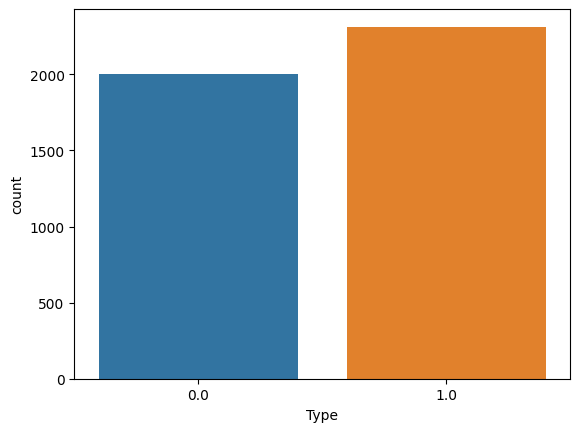

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Type",data=df)

In [10]:

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [11]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Remove Non-Alphabetic Characters (including numbers)

In [13]:
import re

def convert_to_string(DF):
    DF["Comments"]= DF["Comments"].astype(str)
    
def cleanerFn(b):
    # keeps only words with alphabetic characters in comments
    for row in range(len(b)):
        line = b.loc[row, "Comments"]
        b.loc[row,"Comments"] = re.sub("[^a-zA-Z]", " ", line)

In [14]:
convert_to_string(df)

In [13]:
cleanerFn(df)
df.head()

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing so is chemistry i really real...,1.0
2,thanks khan academy wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0


In [15]:

sentences = []
labels = []

for i in range(df.shape[0]):
    sentences.append(df['Comments'][i])
    labels.append(df['Type'][i])

In [16]:
training_size = 3600
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [17]:
vocab_size = 10000                                #the maximum number of words to keep
embedding_dim = 16                                #input shape of neuralnetwork
max_length = 200                                  #maximum length of all sequences.
trunc_type='post'                                 # remove values from sequences larger than maxlen
padding_type='post'                               #pad either before or after each sequence.
oov_tok = "<OOV>"                                 #used to replace out-of-vocabulary words during text_to_sequence calls



tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

#Transforms each text in texts to a sequence of integers. -> training data
training_sequences = tokenizer.texts_to_sequences(training_sentences)           

#This function transforms a list  of sequences into a 2D Numpy array of shape -> Training data
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)    


#Transforms each text in texts to a sequence of integers. -> testing data
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

#This function transforms a list  of sequences into a 2D Numpy array of shape -> testing data
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)




import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)"""



"# loading\nwith open('tokenizer.pickle', 'rb') as handle:\n    tokenizer = pickle.load(handle)"

In [18]:
tokenizer

In [19]:

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# BERT Model

In [20]:
from transformers import BertTokenizer, TFBertForSequenceClassification
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
model_bert.summary()


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [23]:


# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model_bert.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [25]:
num_epochs = 10
history = model_bert.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10


113/113 - 68s - loss: 0.4641 - accuracy: 0.7683 - val_loss: 0.1834 - val_accuracy: 0.9748 - 68s/epoch - 605ms/step
Epoch 2/10
113/113 - 69s - loss: 0.2707 - accuracy: 0.8858 - val_loss: 0.2224 - val_accuracy: 0.8993 - 69s/epoch - 613ms/step
Epoch 3/10
113/113 - 69s - loss: 0.1661 - accuracy: 0.9403 - val_loss: 0.4481 - val_accuracy: 0.7930 - 69s/epoch - 607ms/step
Epoch 4/10
113/113 - 68s - loss: 0.1196 - accuracy: 0.9600 - val_loss: 0.2134 - val_accuracy: 0.9105 - 68s/epoch - 601ms/step
Epoch 5/10
113/113 - 67s - loss: 0.0903 - accuracy: 0.9717 - val_loss: 0.0968 - val_accuracy: 0.9608 - 67s/epoch - 596ms/step
Epoch 6/10
113/113 - 69s - loss: 0.0590 - accuracy: 0.9850 - val_loss: 0.2916 - val_accuracy: 0.8895 - 69s/epoch - 607ms/step
Epoch 7/10
113/113 - 70s - loss: 0.0430 - accuracy: 0.9881 - val_loss: 0.1037 - val_accuracy: 0.9748 - 70s/epoch - 623ms/step
Epoch 8/10
113/113 - 71s - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.1442 - val_accuracy: 0.9441 - 71s/epoch - 625ms/step
Epo

In [26]:
from statistics import mean 
print("Mean Accuracy: ",mean(list(history.history['accuracy'])))

Mean Accuracy:  0.9456111013889312


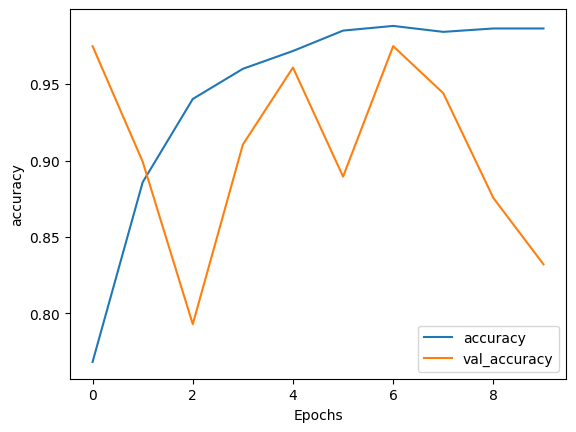

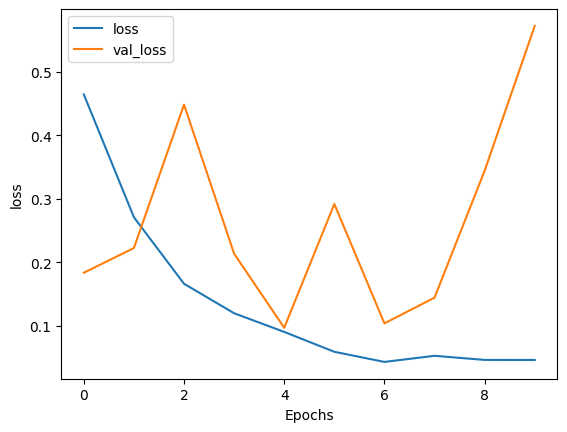

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Bidirectional LSTM

In [25]:
import keras 
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

bi_lstm_model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
bi_lstm_model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
# model summary
bi_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              41472     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 204,593
Trainable params: 204,593
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 10
history = bi_lstm_model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
113/113 - 10s - loss: 0.5779 - accuracy: 0.7072 - val_loss: 0.5696 - val_accuracy: 0.8084 - 10s/epoch - 88ms/step
Epoch 2/10
113/113 - 3s - loss: 0.2593 - accuracy: 0.9175 - val_loss: 0.2132 - val_accuracy: 0.9245 - 3s/epoch - 28ms/step
Epoch 3/10
113/113 - 3s - loss: 0.1134 - accuracy: 0.9656 - val_loss: 0.1874 - val_accuracy: 0.9259 - 3s/epoch - 27ms/step
Epoch 4/10
113/113 - 3s - loss: 0.0621 - accuracy: 0.9833 - val_loss: 0.1013 - val_accuracy: 0.9622 - 3s/epoch - 27ms/step
Epoch 5/10
113/113 - 3s - loss: 0.0347 - accuracy: 0.9936 - val_loss: 0.2452 - val_accuracy: 0.8923 - 3s/epoch - 26ms/step
Epoch 6/10
113/113 - 3s - loss: 0.0189 - accuracy: 0.9958 - val_loss: 0.2757 - val_accuracy: 0.8993 - 3s/epoch - 29ms/step
Epoch 7/10
113/113 - 3s - loss: 0.0118 - accuracy: 0.9981 - val_loss: 0.1756 - val_accuracy: 0.9413 - 3s/epoch - 27ms/step
Epoch 8/10
113/113 - 3s - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.2444 - val_accuracy: 0.9231 - 3s/epoch - 27ms/step
Epoch 9/10
113

In [27]:
from statistics import mean 
print("Mean Accuracy: ",mean(list(history.history['accuracy'])))

Mean Accuracy:  0.9558055639266968


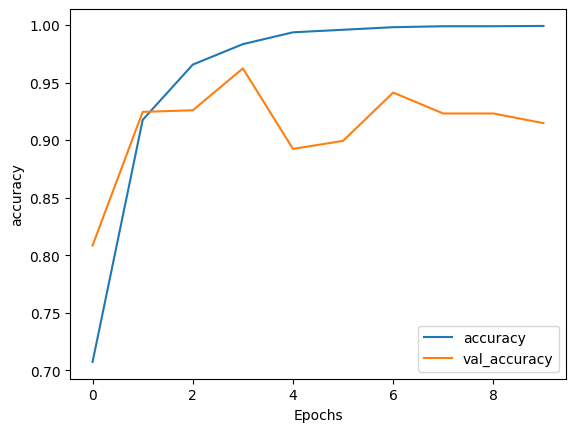

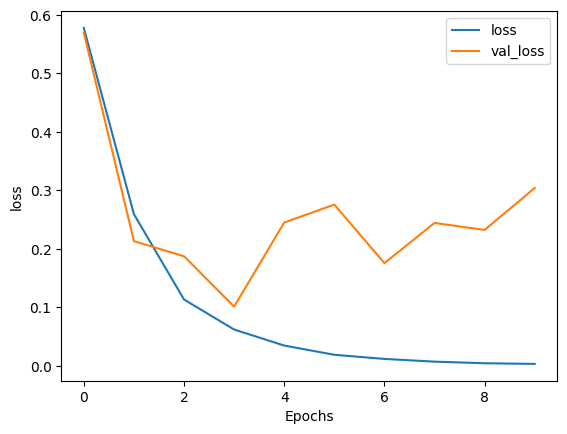

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Simple ANN

In [29]:

ann_model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    
    tf.keras.layers.GlobalAveragePooling1D(),
    
    tf.keras.layers.Dense(24, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 30
history = ann_model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
113/113 - 1s - loss: 0.6620 - accuracy: 0.6425 - val_loss: 0.9986 - val_accuracy: 0.0000e+00 - 824ms/epoch - 7ms/step
Epoch 2/30
113/113 - 0s - loss: 0.6454 - accuracy: 0.6425 - val_loss: 0.9931 - val_accuracy: 0.0000e+00 - 456ms/epoch - 4ms/step
Epoch 3/30
113/113 - 0s - loss: 0.6318 - accuracy: 0.6425 - val_loss: 1.1221 - val_accuracy: 0.0000e+00 - 390ms/epoch - 3ms/step
Epoch 4/30
113/113 - 0s - loss: 0.6006 - accuracy: 0.6425 - val_loss: 0.8915 - val_accuracy: 0.0000e+00 - 425ms/epoch - 4ms/step
Epoch 5/30
113/113 - 1s - loss: 0.5171 - accuracy: 0.7200 - val_loss: 0.6744 - val_accuracy: 0.5790 - 513ms/epoch - 5ms/step
Epoch 6/30
113/113 - 1s - loss: 0.3986 - accuracy: 0.8994 - val_loss: 0.5241 - val_accuracy: 0.8392 - 601ms/epoch - 5ms/step
Epoch 7/30
113/113 - 1s - loss: 0.2985 - accuracy: 0.9444 - val_loss: 0.4439 - val_accuracy: 0.8629 - 608ms/epoch - 5ms/step
Epoch 8/30
113/113 - 0s - loss: 0.2343 - accuracy: 0.9506 - val_loss: 0.3016 - val_accuracy: 0.9538 - 485ms/e

In [32]:
from statistics import mean 
print("Mean Accuracy: ",mean(list(history.history['accuracy'])))

Mean Accuracy:  0.9240370353062948


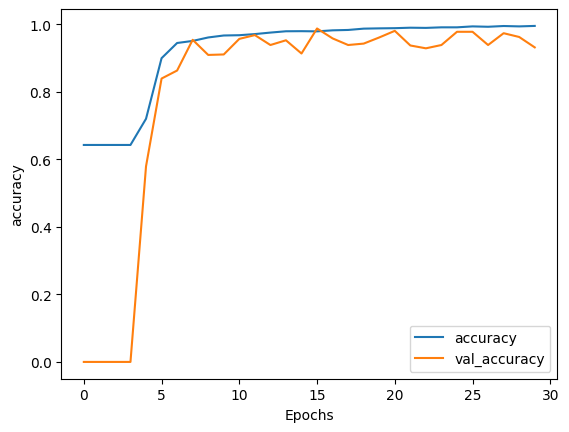

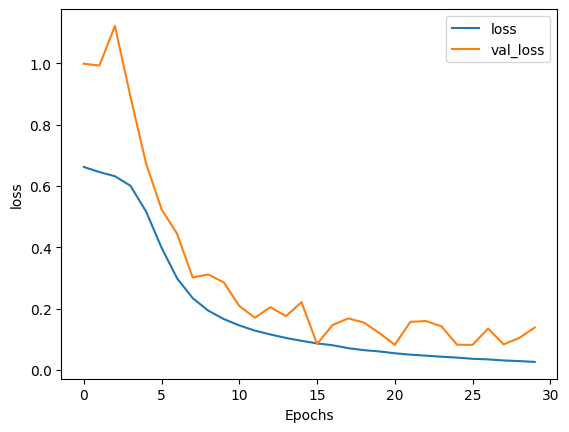

In [33]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [30]:
import keras
ann_model.save("ann.keras")
bi_lstm_model.save("bi_lstm_model.keras")

ann_model = keras.models.load_model("ann.keras")
bi_lstm_model = keras.models.load_model("bi_lstm_model.keras")

In [35]:
sentence = ["This is a very helpfull tutorial", "Very bad playlist and not hlpfull","good vedio","that was bad"," 3456 56345cool 4bro","dude, i was gone","Mindblowing tutorial"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
result1 = ann.predict(padded)
result2 = bi_lstm.predict(padded)



1/1 [==============================] - 1s 527ms/step


In [36]:
result1

array([[0.99752563],
       [0.1918726 ],
       [0.966446  ],
       [0.04741804],
       [0.60328716],
       [0.28860384],
       [0.9560904 ]], dtype=float32)

In [37]:
result2
np.set_printoptions(suppress = True,formatter = {'float_kind':'{:f}'.format})

In [38]:
result2

array([[0.999992],
       [0.003711],
       [0.999899],
       [0.001329],
       [0.839344],
       [0.110131],
       [0.998109]], dtype=float32)

# Evaluation

In [ ]:
"""
model_bert
bi_lstm_model
ann_model
"""

In [37]:
!pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



predictions = model_bert.predict(testing_padded)

# Evaluate the model
accuracy = accuracy_score(testing_labels, predictions)
conf_matrix = confusion_matrix(testing_labels, predictions)
classification_rep = classification_report(testing_labels, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


In [40]:
predictions

TFSequenceClassifierOutput(loss=None, logits=array([[ 2.3650818 , -2.8729005 ],
       [ 3.1774745 , -3.6584308 ],
       [ 2.87967   , -3.4281077 ],
       ...,
       [-2.822638  ,  3.3392098 ],
       [-0.31910697,  0.23228845],
       [ 2.75067   , -3.278517  ]], dtype=float32), hidden_states=None, attentions=None)

In [41]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



predictions = bi_lstm_model.predict(testing_padded)

# Evaluate the model
accuracy = accuracy_score(testing_labels, predictions)
conf_matrix = confusion_matrix(testing_labels, predictions)
classification_rep = classification_report(testing_labels, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

23/23 [==============================] - 3s 18ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [45]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



y_pred = ann_model.predict(testing_padded)

# Evaluate the model
accuracy = accuracy_score(testing_labels, y_pred.round(), normalize=False)
conf_matrix = confusion_matrix(testing_labels, y_pred.round())
classification_rep = classification_report(testing_labels, y_pred.round())

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

 1/23 [>.............................] - ETA: 0s

23/23 [==============================] - 0s 2ms/step
Accuracy: 289
Confusion Matrix:
[[289 426]
 [  0   0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.40      0.58       715
         1.0       0.00      0.00      0.00         0

    accuracy                           0.40       715
   macro avg       0.50      0.20      0.29       715
weighted avg       1.00      0.40      0.58       715



c:\Users\RAZER\anaconda3\envs\Viper\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\RAZER\anaconda3\envs\Viper\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\RAZER\anaconda3\envs\Viper\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

